In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable



In [2]:

import matplotlib as mlib
from scipy import stats

mlib.rcParams.update({'font.size': 25})
mlib.rcParams.update({'errorbar.capsize': 5})

# Sigma stim vs sigma form lat

In [4]:
# I forgot to save p_elim_dep for each run. Extract it from file name
data = np.load("C:/Work/phd/simulation_statistics/batch_analysis_174130_09022018.npz")
metadata = np.load("C:/Work/phd/simulation_statistics/batch_4f872630a933552a4dd01a1a20b6af6c.npz")
print data['recording_archive_name']
print 'Total time taken for simulations:', metadata['total_time']

../synaptogenesis/4f872630a933552a4dd01a1a20b6af6c/case1_sstim3.5_sformlat3.5_run1_randpart_@4f872630a933552a4dd01a1a20b6af6c.npz
Total time taken for simulations: 7:27:52.075037


In [5]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

In [6]:
parameters_of_interest = metadata['parameters_of_interest']

In [7]:
parameters_of_interest

array({'sigma_form_lats': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'no_runs': 1, 'cases': [1], 'lateral_inhibitions': 1, 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}, dtype=object)

In [8]:
all_names = np.asarray(results.dtype.names)
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(49L, 17L)
(49L, 17L)
833


In [9]:
del parameters_of_interest.ravel()[0]['no_runs']

In [10]:
parameters_of_interest.ravel()[0]['sigma_form_laterals'] = parameters_of_interest.ravel()[0].pop('sigma_form_lats')

In [11]:
params_of_interest = parameters_of_interest.ravel()[0].keys()
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi][:-1]]

In [12]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [13]:
results_with_poi

array([[  4.63411458e-01,   4.87109375e+00,   2.10263421e-01,
          1.92483934e+00,   1.99356876e+00,   1.04903168e+00,
          1.01517828e+00,   1.59271694e+00,   1.61071228e+00,
          2.41549096e+00,   2.44086750e+00,   5.00000000e-01,
          1.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  2.83828125e-01,   1.16406250e+00,   1.59998132e-01,
          5.44515524e-01,   5.18394224e-01,   1.27577698e-01,
          1.10936780e-01,   1.75936522e+00,   1.82320187e+00,
          1.25559978e+00,   1.28513696e+00,   1.00000000e+00,
          1.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  1.85299479e-01,   1.13281250e-01,   4.74811422e-02,
          5.85937500e-03,   5.85937500e-03,   0.00000000e+00,
          0.00000000e+00,   3.37313000e-01,   3.21364427e-01,
          8.68087776e-02,   8.68087776e-02,   1.50000000e+00,
          1.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  1.67695312e-01,   1.01562500e-01,   1.60945012e-01,
     

In [14]:
parameters_of_interest

array({'sigma_form_laterals': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'lateral_inhibitions': 1, 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'cases': [1]}, dtype=object)

In [15]:
sigma_stims = parameters_of_interest.ravel()[0]['sigma_stims']
sigma_form_laterals = parameters_of_interest.ravel()[0]['sigma_form_laterals']
hardcoded_t_record = 300 * second

print sigma_stims
print sigma_form_laterals
print params_of_interest

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
['sigma_form_laterals', 'lateral_inhibitions', 'sigma_stims', 'cases']


In [16]:

rates_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
weight_prop = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

no_ff_conns= np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan


CASE_1 = 1
for index, _ in np.ndenumerate(std_weight_all_results):
    sigma_index, sform_index = index
    logical_filter = np.logical_and(
                        results_with_poi[:,-4]==sigma_form_laterals[sform_index], 
                        results_with_poi[:, -2]==sigma_stims[sigma_index])
    
    std_weight_all_results[index] = results_with_poi[logical_filter].ravel()[6]
    ad_weight_all_results[index] = results_with_poi[logical_filter].ravel()[10]
    # use different set of results
    std_conn_all_results[index] =results_with_poi[logical_filter].ravel()[4]
    ad_conn_all_results[index] = results_with_poi[logical_filter].ravel()[8]
    
    rates_all_results[index] = results_with_poi[logical_filter].ravel()[0]
    weight_prop[index] = results_with_poi[logical_filter].ravel()[2]
    
    no_ff_conns[index] = results_with_poi[logical_filter].ravel()[1]
    



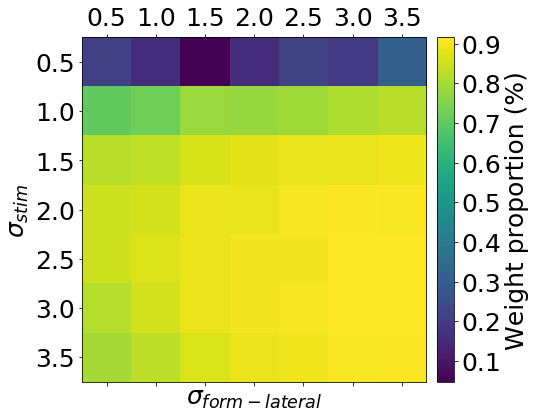

In [17]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(weight_prop)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Weight proportion (%)")
plt.tight_layout()
f.savefig('weight_proportion_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

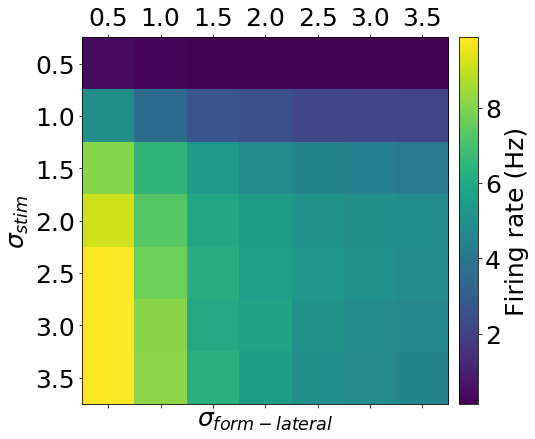

In [18]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(rates_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Firing rate (Hz)")
plt.tight_layout()
f.savefig('rates_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

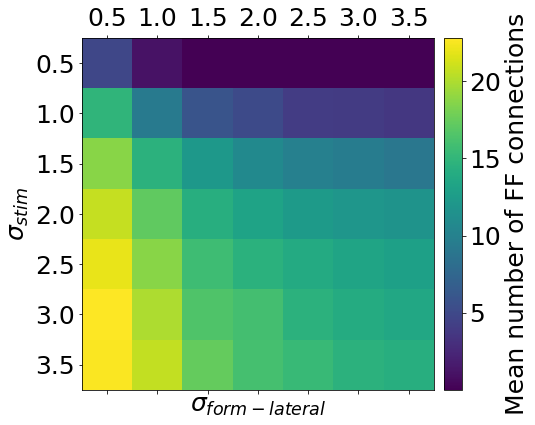

In [19]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(no_ff_conns)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean number of FF connections")
plt.tight_layout()
f.savefig('no_ff_conns_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

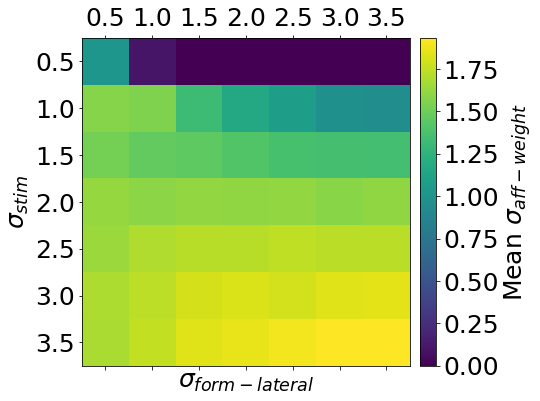

In [20]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-weight}$")
plt.tight_layout()
f.savefig('std_weight_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

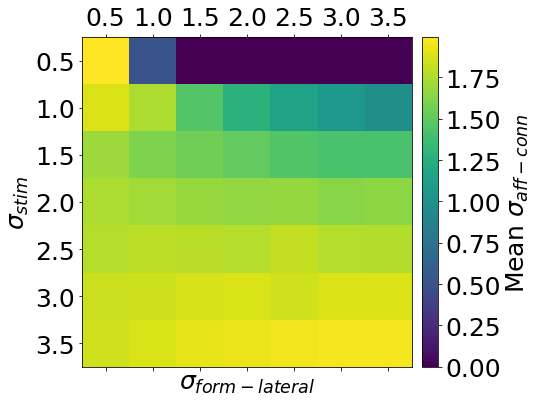

In [21]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-conn}$")
plt.tight_layout()
f.savefig('std_conn_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

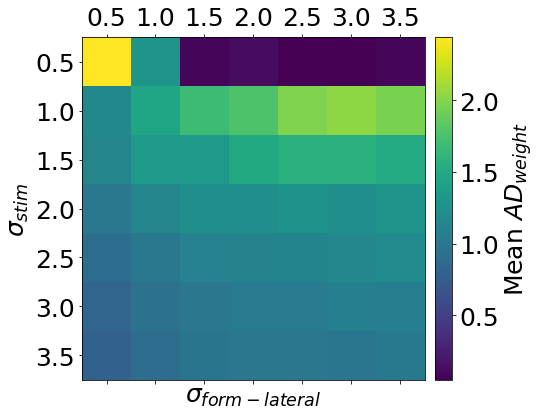

In [22]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{weight}$")
plt.tight_layout()
f.savefig('ad_weight_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

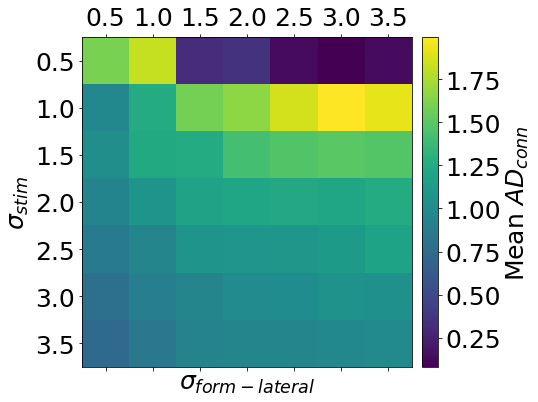

In [23]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{conn}$")
plt.tight_layout()
f.savefig('ad_conn_sigma_stim_vs_sigma_form_lat_rand_partner_LAT_INH.png')

# These details in numbers

In [24]:
from pprint import pprint as pp
print "rates_all_results \n", pp(rates_all_results)
print "weight_prop \n", pp(weight_prop )

print "std_weight_all_results \n", pp(std_weight_all_results) 
print "ad_weight_all_results \n", pp(ad_weight_all_results) 

print "std_conn_all_results \n", pp(std_conn_all_results) 
print "ad_conn_all_results \n", pp(ad_conn_all_results)

print "no_ff_conns \n", pp(no_ff_conns)


rates_all_results 
array([[ 0.46341146,  0.28382812,  0.18529948,  0.16769531,  0.15235677,
         0.14342448,  0.14014323],
       [ 4.93925781,  3.54669271,  2.71070313,  2.55799479,  2.24682292,
         2.20005208,  2.15867188],
       [ 8.08592448,  6.49688802,  5.3616276 ,  4.79925781,  4.49389323,
         4.36983073,  4.19641927],
       [ 9.14550781,  7.34919271,  5.94654948,  5.46020833,  5.11165365,
         4.9503776 ,  4.86003906],
       [ 9.82502604,  7.72908854,  6.1993099 ,  5.60757812,  5.23236979,
         5.04313802,  4.8450651 ],
       [ 9.86165365,  8.13356771,  6.06303385,  5.77126302,  5.1096875 ,
         4.79391927,  4.63445313],
       [ 9.85527344,  8.16148438,  6.29623698,  5.46415365,  4.97145833,
         4.72143229,  4.48248698]])
None
weight_prop 
array([[ 0.21026342,  0.15999813,  0.04748114,  0.16094501,  0.226163  ,
         0.19356864,  0.31420898],
       [ 0.70460671,  0.72210235,  0.78394831,  0.78067128,  0.79264594,
         0.80974632,  0.8

In [25]:
np.unravel_index(std_weight_all_results.argmin(), std_weight_all_results.shape)

(0, 2)

In [26]:
np.unravel_index(ad_weight_all_results.argmin(), ad_weight_all_results.shape)

(0, 4)

In [27]:
np.unravel_index(std_weight_all_results.argmax(), std_weight_all_results.shape)

(6, 6)

In [28]:
np.unravel_index(ad_weight_all_results.argmax(), ad_weight_all_results.shape)

(0, 0)